In [1]:
import numpy as np
import matplotlib.pyplot as plt
import progressbar
%matplotlib inline

In [2]:
#Simple neural network with a single hidden layer
def neural_network(x,w_1,w_2,activation_fn = np.tanh):
    temp = activation_fn(x @ w_1)
    return temp @ w_2

In [3]:
#Data generation for Bayesian training
x = np.linspace(1,6,200)
noise = np.array([np.random.normal(0,1) for _ in range(x.shape[0])])
y = np.sin(x) + noise
#W1 = np.random.normal([0,0],1)
#W2 = np.random.normal([[0],[0]],1)
#y_ = []
#for each_x in x:
#    y_.append(neural_network(np.reshape(each_x,(1,1)),np.reshape(W1,(1,2)),np.reshape(W2,(2,1))))
#y_ = np.array(y)
#print(y_.shape)

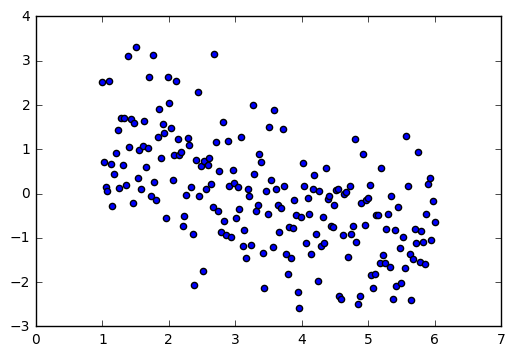

In [4]:
plt.scatter(x,y)

In [5]:
#Bayesian Neural Network
input_layer_dim = 1
hidden_layer_dim = 2
output_layer_dim = 1

In [6]:
def gaussian(y,function,std = 1.0):
    constant = (1/(np.sqrt(2*np.pi)*std))
    return constant*np.exp(-((y-function)**2)/(2*(std**2)))

In [7]:
def log_gaussian(y,function,std = 1.0):
    constant = np.log((1/(np.sqrt(2*np.pi)*std)))
    return constant+(-((y-function)**2)/(2*(std**2)))

In [8]:
def metropolis_acceptance(new_sample,old_sample):
    alpha = min(1,np.exp(new_sample - old_sample))
    #print(alpha)
    #print(new_sample,old_sample)
    if np.random.uniform(0,1) <= alpha:
        return True
    else:
        return False

In [9]:
iterations = 10000
initial_variance = 1
variance = 1
w_1 = np.random.normal(0,[initial_variance,initial_variance])
w_2 = np.random.normal(0,[[initial_variance],[initial_variance]])
#print(w_1,w_2)
w_1_list = []
w_2_list = []
likelihood_old = 0
bar1 = progressbar.ProgressBar()
for k in bar1(range(iterations)):
    if k==0:
        for each_x,each_y in zip(x,y):
            func = neural_network(np.reshape(each_x,(1,1)),np.reshape(w_1,(1,2)),np.reshape(w_2,(2,1)))
            #likelihood_old += np.log(gaussian(each_y,func))
            likelihood_old += log_gaussian(each_y,func)
    else:
        new_w_1 = np.random.normal(w_1,variance)
        new_w_2 = np.random.normal(w_2,variance)
        likelihood_prime = 0
        for each_x,each_y in zip(x,y):
            func = neural_network(np.reshape(each_x,(1,1)),np.reshape(new_w_1,(1,2)),np.reshape(new_w_2,(2,1)))
            #likelihood_prime += np.log(gaussian(each_y,func))
            likelihood_prime += log_gaussian(each_y,func)
        #print(gaussian(each_y,func))
        if metropolis_acceptance(likelihood_prime,likelihood_old):
            w_1 = new_w_1
            w_2 = new_w_2
            if(k>2000):
                w_1_list.append(w_1)
                w_2_list.append(w_2)
            likelihood_old = likelihood_prime
            #print("accepted{0}".format(str(k)))
        else:
            w_1 = w_1
            w_2 = w_2
            likelihood_old = likelihood_old
print(w_1_list)
print(w_2_list)

100% (10000 of 10000) |###################| Elapsed Time: 0:00:30 Time: 0:00:30


[array([-0.21714145, -2.05862867]), array([-0.2249088 , -2.77778437]), array([-0.29728832, -1.29354718]), array([-0.31730274, -0.86551919]), array([-0.40830315, -0.99675035]), array([ 1.87185837,  0.31100742]), array([ 2.31036774,  0.12650205]), array([ 1.64960982,  0.258668  ]), array([ 1.26470824,  0.35577005]), array([ 1.17811159,  0.34810604]), array([ 2.58960669,  0.25117481]), array([ 2.78444492,  0.32798636]), array([ 3.95145343,  0.21095292]), array([ 3.46078229,  0.16890784]), array([ 4.86120982,  0.2673169 ]), array([ 3.48676522,  0.13149085]), array([ 3.50341485,  0.10608274]), array([ 4.98641969,  0.31543848]), array([ 4.88293604,  0.27514458]), array([ 4.31989785,  0.29336671]), array([ 5.16931999,  0.31659268]), array([ 7.9057421,  0.4177536])]
[array([[ 3.1609786 ],
       [-1.83429074]]), array([[ 3.73087436],
       [-2.1849715 ]]), array([[ 4.56676051],
       [-3.2626389 ]]), array([[ 4.52800475],
       [-3.37491878]]), array([[ 5.28923008],
       [-4.4149986 ]]), 

In [10]:
#w_1_list_new = w_1_list[-2000:]
#w_2_list_new = w_2_list[-2000:]
decision = []
for each_x in x:
    temp = []
    for each_w_1,each_w_2 in zip(w_1_list,w_2_list):
        temp.append(neural_network(np.reshape(each_x,(1,1)),np.reshape(each_w_1,(1,2)),np.reshape(each_w_2,(2,1))))
    decision.append(np.mean(np.array(temp)))
    #print(np.mean(np.array(temp)))
print(np.sum((np.array(decision) - np.reshape(y,(np.shape(x)[0],1)))**2))
print(np.sum(y**2))

82334.6818501
307.743193992


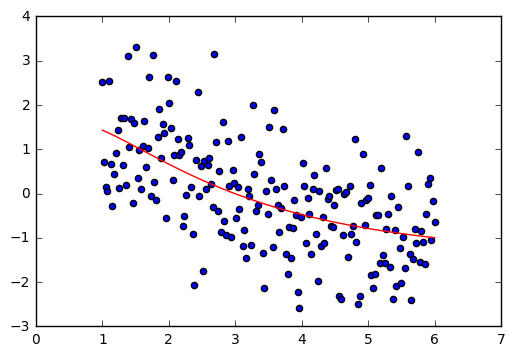

In [11]:
plt.scatter(x,y)
plt.plot(x,decision,c = "r")

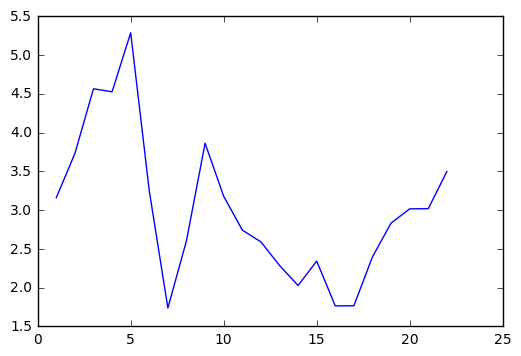

In [12]:
temp_w_list = [each[0] for each in w_2_list]
plt.plot(np.linspace(1,len(temp_w_list),len(temp_w_list)),temp_w_list)

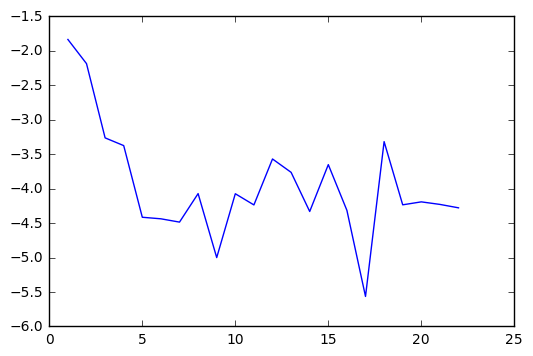

In [13]:
temp_w_list = [each[1] for each in w_2_list]
plt.plot(np.linspace(1,len(temp_w_list),len(temp_w_list)),temp_w_list)

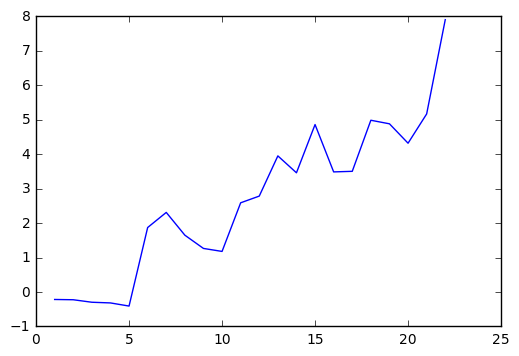

In [14]:
temp_w_list = [each[0] for each in w_1_list]
plt.plot(np.linspace(1,len(temp_w_list),len(temp_w_list)),temp_w_list)

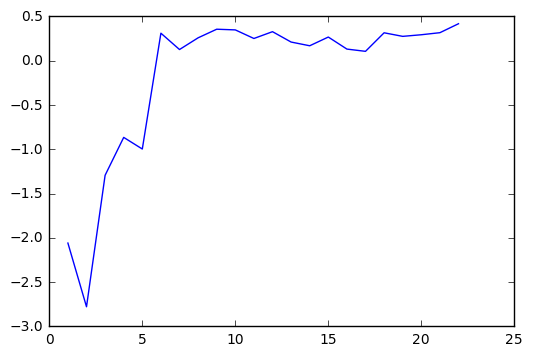

In [15]:
temp_w_list = [each[1] for each in w_1_list]
plt.plot(np.linspace(1,len(temp_w_list),len(temp_w_list)),temp_w_list)